# **Step 1. Begin by importing the necessary libraries.**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# **Step 2. Let's Load the dataset and read**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


# **Step 3. Explore the dataset to understand its structure.**

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
corr =df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.00,-0.12,0.87,0.82,0.78
sepal width (cm),-0.12,1.00,-0.43,-0.37,-0.43
petal length (cm),0.87,-0.43,1.00,0.96,0.95
petal width (cm),0.82,-0.37,0.96,1.00,0.96
target,0.78,-0.43,0.95,0.96,1.00


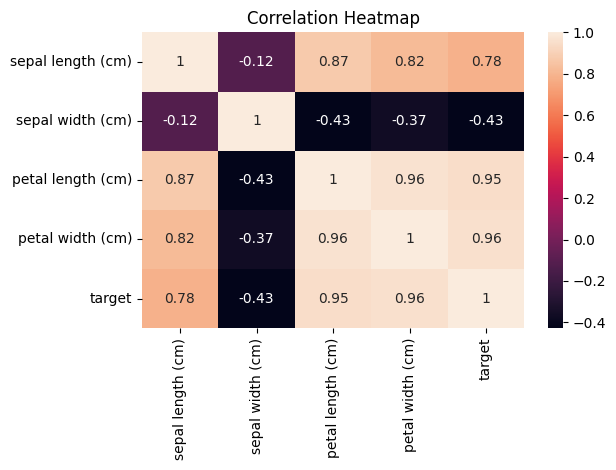

In [ ]:
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

<Axes: >

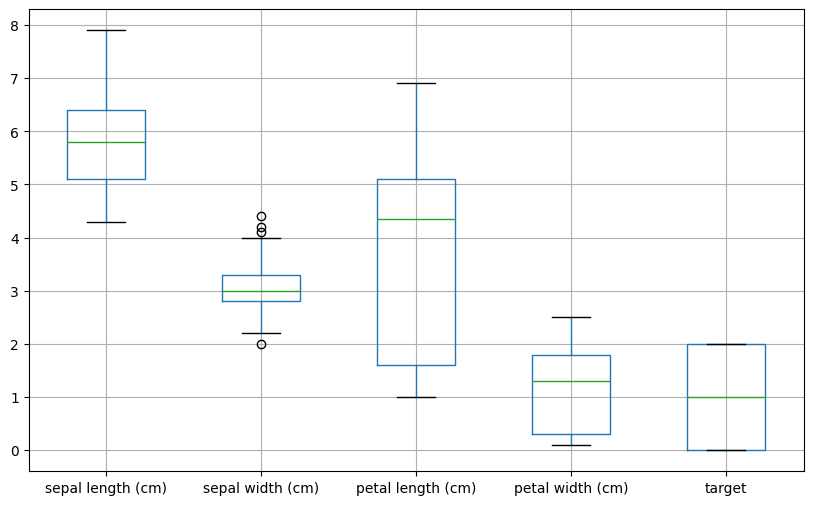

In [ ]:

plt.figure(figsize=(10,6))
df.boxplot()

# **Step 4. Split the data Set into X(independent) and y(dependent) Variable**

In [ ]:
X = df.drop(columns='target', axis='columns')
y = df['target']

# **Step 5. Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# **Step 6. Model Selection**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# **Step 7. Training the ML model and validating its performance based on accuracy.**

In [ ]:
#pip install Lazypredict


In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.176574
[LightGBM] [Info] Start training from score -1.003302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [ ]:
# Desplying the performance
pd.set_option('display.width', None)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.97,0.97,None,0.97,0.02
LinearDiscriminantAnalysis,0.93,0.95,None,0.94,0.02
XGBClassifier,0.93,0.95,None,0.94,0.07
ExtraTreesClassifier,0.90,0.92,None,0.90,0.13
AdaBoostClassifier,0.90,0.92,None,0.90,0.14
PassiveAggressiveClassifier,0.93,0.91,None,0.93,0.02
DecisionTreeClassifier,0.87,0.90,None,0.87,0.02
KNeighborsClassifier,0.87,0.90,None,0.87,0.02
BaggingClassifier,0.90,0.89,None,0.90,0.05


As shown above, QuadraticDiscriminantAnalysis has the highest accuracy score, so we will use this model for training.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




# Step 8. The final step is to review the model's performance reports.

In [ ]:
from sklearn.metrics import  confusion_matrix
print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print("Classificaton Reports\n",classification_report(y_test, y_pred))


Confusion Matrix:
  [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classificaton Reports
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

